In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:06<00:00, 297MB/s]
100% 812M/812M [00:06<00:00, 125MB/s]


In [ ]:

!unzip -q dogs-vs-cats.zip -d dogs_vs_cats
!unzip -q dogs_vs_cats/train.zip -d dogs_vs_cats/train
!unzip -q dogs_vs_cats/test1.zip -d dogs_vs_cats/test


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

IMG_SIZE = 64
LIMIT_IMAGES = 2000

def load_dataset(path, limit=None):
    X, y = [], []
    files = os.listdir(path)
    if limit:
        files = files[:limit]

    for file in tqdm(files, desc="Processing images"):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img.flatten())  # flatten for SVM
        label = 1 if "dog" in file else 0
        y.append(label)

    return np.array(X), np.array(y)

print("Loading training data...")
X, y = load_dataset("dogs_vs_cats/train", limit=LIMIT_IMAGES)


Loading training data...


Processing images: 100%|██████████| 1/1 [00:00<00:00, 54.56it/s]


In [ ]:
import os

DATASET_PATH = "/content/dogs_vs_cats/train"

print("Files in train folder:", len(os.listdir(DATASET_PATH)))
print("First 10 files:", os.listdir(DATASET_PATH)[:10])


Files in train folder: 1
First 10 files: ['train']


In [ ]:
DATASET_PATH = "/content/dogs-vs-cats/train/train"


In [ ]:
import os

for root, dirs, files in os.walk("/content/dogs-vs-cats"):
    print(root, len(files), "files")
    if files:
        print("Example files:", files[:5])


In [ ]:

!unzip -q dogs-vs-cats.zip -d dogs_vs_cats


!unzip -q dogs_vs_cats/train.zip -d dogs_vs_cats/train
!unzip -q dogs_vs_cats/test1.zip -d dogs_vs_cats/test

# Verify
import os
print("Train folder:", len(os.listdir("dogs_vs_cats/train")))
print("Test folder:", len(os.listdir("dogs_vs_cats/test")))


replace dogs_vs_cats/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace dogs_vs_cats/train/train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace dogs_vs_cats/test/test1/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Train folder: 1
Test folder: 1


In [ ]:
DATASET_PATH = "dogs_vs_cats/train"
TEST_PATH = "dogs_vs_cats/test"


In [ ]:
import os, shutil

src_train = "/content/dogs_vs_cats/train/train"
dst_train = "/content/dogs_vs_cats/train"

for file in os.listdir(src_train):
    shutil.move(os.path.join(src_train, file), dst_train)

os.rmdir(src_train)


src_test = "/content/dogs_vs_cats/test/test1"
dst_test = "/content/dogs_vs_cats/test"

for file in os.listdir(src_test):
    shutil.move(os.path.join(src_test, file), dst_test)

os.rmdir(src_test)

print("Dataset folder structure fixed.")
print("Train files:", len(os.listdir(dst_train)))
print("Test files:", len(os.listdir(dst_test)))


Dataset folder structure fixed.
Train files: 25000
Test files: 12500


In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import random

train_dir = "/content/dogs_vs_cats/train"

X = []
y = []

files = os.listdir(train_dir)
random.shuffle(files)

files = files[:2000]

for file in files:
    label = 1 if "dog" in file else 0
    img_path = os.path.join(train_dir, file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (32, 32))
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Data shape:", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Data shape: (2000, 3072) (2000,)
Accuracy: 0.5725


Accuracy: 0.52


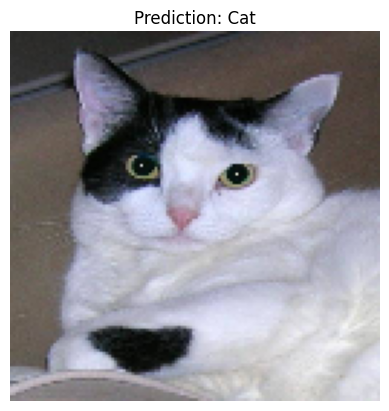

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

train_dir = "/content/dogs_vs_cats/train"

X = []
y = []

files = os.listdir(train_dir)
random.shuffle(files)
files = files[:2000]

for file in files:
    label = 1 if "dog" in file else 0
    img_path = os.path.join(train_dir, file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (128, 128))
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


clf = SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

idx = random.randint(0, len(X_test) - 1)
img = X_test[idx].reshape(128, 128, 3).astype(np.uint8)
pred_label = clf.predict([X_test[idx]])[0]
label_text = "Dog" if pred_label == 1 else "Cat"

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {label_text}")
plt.axis('off')
plt.show()
